# Loan Prediction with Various Machine Learning Models

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importing Regression Modules
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Read Data

In [4]:
df = pd.read_csv('Data for Cleaning _ Modeling.csv')

df.head()

/var/folders/04/yllkntj5677_mvn3c6nn113r0000gn/T/ipykernel_78307/352776460.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data for Cleaning _ Modeling.csv')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

In [4]:
null_counts = df.isnull().sum()
null_counts

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

## Data Cleaning

## Columns Dropped

X10: Employer or job title (self-filled). No substantial insights gained that are not already shown by X11 or X13
X16: Reason for loan provided by borrower.  
X18: Loan title, as provided by borrower. No substantial insights gained.  
X19: First 3 numbers of zip code. Described by X20 (State of borrower).  
X25: Number of months since the borrower's last delinquency. A lot of missing values and can be described by data in X22.  
X26: Number of months since the last public record. A lot of missing values and cessentially showing same information as X28.  

In [5]:
df = df.drop(['X10', 'X17', 'X18', 'X19', 'X25','X26','X16'], axis=1)

## Rows Dropped
Rows with missing values in X1 are dropped because X1 is the target variable.

In [6]:
df = df.dropna(subset=['X1'], axis=0)

In [7]:
#removing the percent sign and changing it float type
df['X1'] = pd.to_numeric(df['X1'].str.rstrip('%'), errors='coerce')

df['X1'] = df['X1'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  object 
 4   X5      338989 non-null  object 
 5   X6      338989 non-null  object 
 6   X7      338989 non-null  object 
 7   X8      287123 non-null  object 
 8   X9      287123 non-null  object 
 9   X11     324195 non-null  object 
 10  X12     287030 non-null  object 
 11  X13     287238 non-null  float64
 12  X14     338989 non-null  object 
 13  X15     338989 non-null  object 
 14  X20     338989 non-null  object 
 15  X21     338989 non-null  float64
 16  X22     338989 non-null  float64
 17  X23     338989 non-null  object 
 18  X24     338989 non-null  float64
 19  X27     338989 non-null  float64
 20  X28     338989 non-null  float64
 21  X29     33

In [9]:
null_counts = df.isnull().sum()
null_counts

X1         0
X2         1
X3         1
X4         1
X5         1
X6         1
X7         1
X8     51867
X9     51867
X11    14795
X12    51960
X13    51752
X14        1
X15        1
X20        1
X21        1
X22        1
X23        1
X24        1
X27        1
X28        1
X29        1
X30      225
X31        1
X32        1
dtype: int64

## Handling Missing Values

### X13: Annual income of borrower.

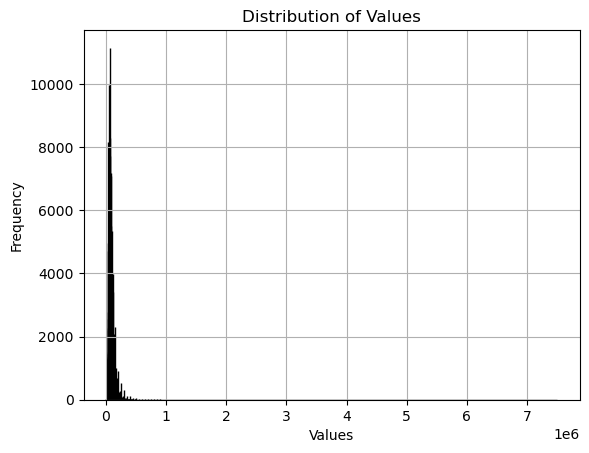

In [10]:
plt.hist(df['X13'], bins=30000, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values')
plt.grid(True)
plt.show()

In [11]:
# Missing values are replaced with median income because distribution is skewed
df['X13'].fillna(df['X13'].median(), inplace=True)

### X8: Loan Grade

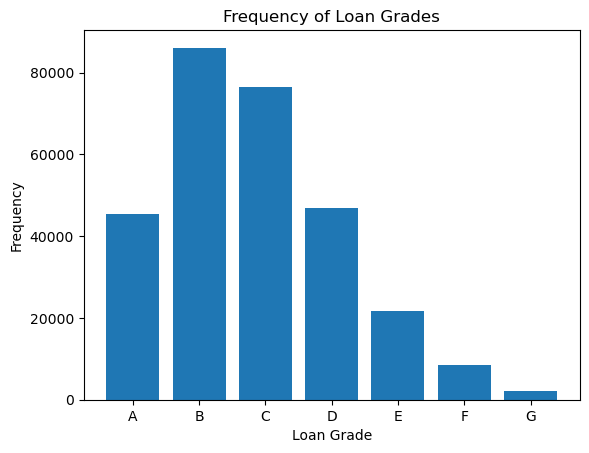

In [12]:
loan_grade_counts = df['X8'].value_counts()

loan_grade_counts = loan_grade_counts.sort_index()

plt.bar(loan_grade_counts.index, loan_grade_counts.values)

plt.xlabel('Loan Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Loan Grades')

plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Change loan grade data to numeric
label_encoder = LabelEncoder()
df['X8'] = label_encoder.fit_transform(df['X8'])

In [15]:
# Missing values are replaced with median income because distribution is skewed
median_value = df['X8'].median()

df['X8'].fillna(median_value, inplace=True)
df['X8'] = df['X8'].astype(float)


### X9: Loan subgrade

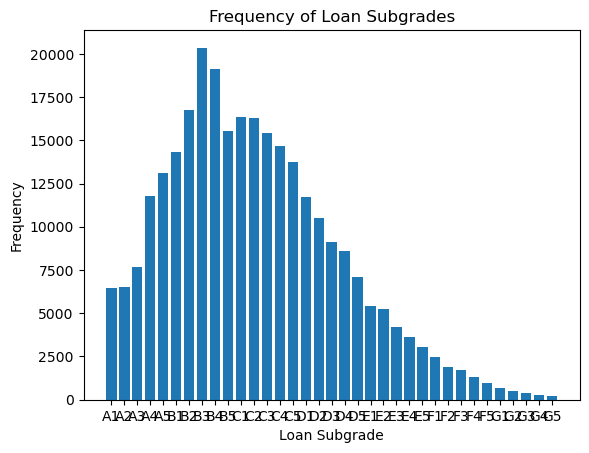

In [16]:
loan_subgrade_counts = df['X9'].value_counts()

loan_subgrade_counts = loan_subgrade_counts.sort_index()

plt.bar(loan_subgrade_counts.index, loan_subgrade_counts.values)

plt.xlabel('Loan Subgrade')
plt.ylabel('Frequency')
plt.title('Frequency of Loan Subgrades')

plt.show()

In [17]:
df['X9'] = label_encoder.fit_transform(df['X9'])

In [18]:
# Missing values are replaced with median income because distribution is skewed
median_value = df['X9'].median()

df['X9'].fillna(median_value, inplace=True)
df['X9'] = df['X9'].astype(float)


### X11: Number of years employed (0 to 10; 10 = 10 or more)

In [19]:
# change format to numerical
df['X11'] = df['X11'].str.replace(' years?', '', regex=True)
df['X11'] = df['X11'].replace({'< 1': 0, '<1': 0, '< 1 ': 0}, regex=True)
df['X11'] = df['X11'].replace('\+', '', regex=True)
df['X11'] = df['X11'].astype(float)
label_encoder = LabelEncoder()
df['X11'] = label_encoder.fit_transform(df['X11'])
df['X11'] = df['X11'].astype(float)

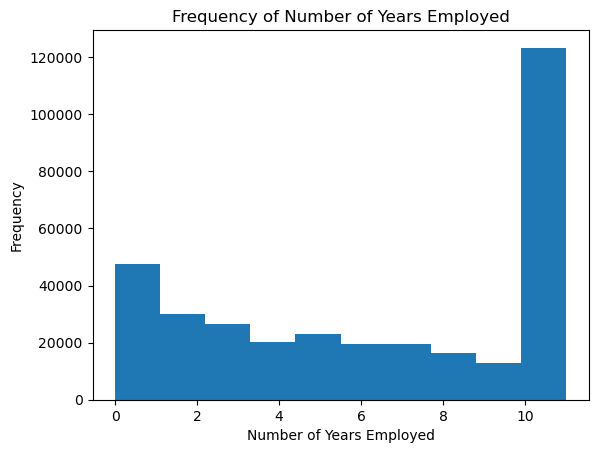

In [20]:
plt.hist(df['X11'])

plt.xlabel('Number of Years Employed')
plt.ylabel('Frequency')
plt.title('Frequency of Number of Years Employed')

plt.show()

In [21]:
# Missing values are replaced with median income because distribution is skewed               
median_value = df['X11'].median()

df['X11'].fillna(median_value, inplace=True)

### X12: Home ownership status: RENT, OWN, MORTGAGE, OTHER.

In [22]:
label_encoder = LabelEncoder()
df['X12'] = label_encoder.fit_transform(df['X12'])
df['X12'] = df['X12'].astype(float)

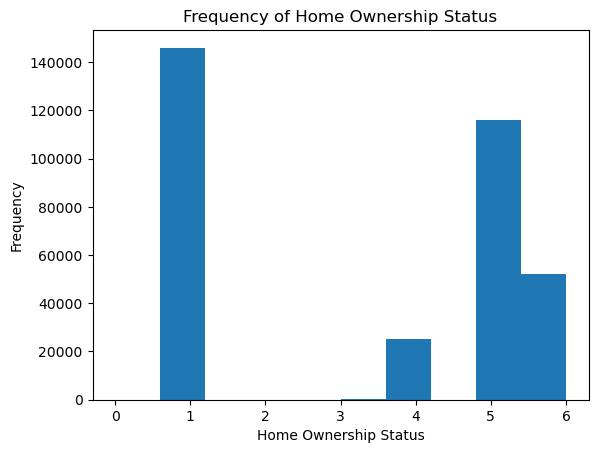

In [23]:
plt.hist(df['X12'])

plt.xlabel('Home Ownership Status')
plt.ylabel('Frequency')
plt.title('Frequency of Home Ownership Status')

plt.show()

In [24]:
# change missing values to 'OTHER' because 'OTHER' works as an umbrella term
df['X12'].replace(6, 5, inplace=True)

### X30: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [25]:
df['X30']

0         52.10%
1         76.70%
2         66.30%
3         40.40%
4         25.60%
           ...  
399995    76.10%
399996    37.80%
399997    69.30%
399998       39%
399999    53.70%
Name: X30, Length: 338990, dtype: object

In [26]:
df['X30'] = df['X30'].replace('%', '', regex=True)

In [27]:
df['X30'] = df['X30'].astype(float)

In [28]:
df['X30']

0         52.1
1         76.7
2         66.3
3         40.4
4         25.6
          ... 
399995    76.1
399996    37.8
399997    69.3
399998    39.0
399999    53.7
Name: X30, Length: 338990, dtype: float64

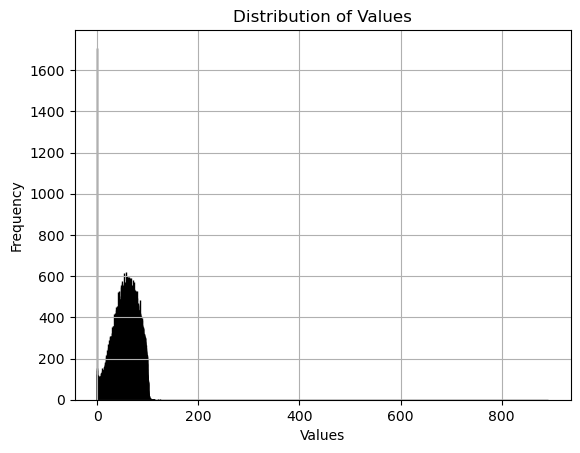

In [29]:
plt.hist(df['X30'], bins=30000, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values')
plt.grid(True)
plt.show()

In [30]:
# The distribution looks symmetrical enough that we will use mean to replace missing values
mean_value = df['X30'].mean()

df['X30'].fillna(mean_value, inplace=True)

In [31]:
df.isnull().sum()

X1     0
X2     1
X3     1
X4     1
X5     1
X6     1
X7     1
X8     0
X9     0
X11    0
X12    0
X13    0
X14    1
X15    1
X20    1
X21    1
X22    1
X23    1
X24    1
X27    1
X28    1
X29    1
X30    0
X31    1
X32    1
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  object 
 4   X5      338989 non-null  object 
 5   X6      338989 non-null  object 
 6   X7      338989 non-null  object 
 7   X8      338990 non-null  float64
 8   X9      338990 non-null  float64
 9   X11     338990 non-null  float64
 10  X12     338990 non-null  float64
 11  X13     338990 non-null  float64
 12  X14     338989 non-null  object 
 13  X15     338989 non-null  object 
 14  X20     338989 non-null  object 
 15  X21     338989 non-null  float64
 16  X22     338989 non-null  float64
 17  X23     338989 non-null  object 
 18  X24     338989 non-null  float64
 19  X27     338989 non-null  float64
 20  X28     338989 non-null  float64
 21  X29     33

## Format All Columns Numerical

In [33]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,11.89,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,1.0,8.0,0.0,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.1,42.0,f
1,10.71,55742.0,114426.0,"$7,000","$7,000",$673,36 months,1.0,9.0,0.0,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.7,7.0,f
2,16.99,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,3.0,17.0,1.0,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.3,17.0,f
3,13.11,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,2.0,11.0,10.0,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.4,31.0,f
4,13.57,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,2.0,12.0,6.0,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.6,40.0,f


In [34]:
df['X4'] = df['X4'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
df['X5'] = df['X5'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
df['X6'] = df['X6'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)

/var/folders/04/yllkntj5677_mvn3c6nn113r0000gn/T/ipykernel_46740/2008793394.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['X4'] = df['X4'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
/var/folders/04/yllkntj5677_mvn3c6nn113r0000gn/T/ipykernel_46740/2008793394.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['X5'] = df['X5'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
/var/folders/04/yllkntj5677_mvn3c6nn113r0000gn/T/ipykernel_46740/2008793394.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as l

In [35]:
df['X7'] = df['X7'].replace(' months', '', regex=True)

label_encoder = LabelEncoder()
df['X7'] = label_encoder.fit_transform(df['X7'])
df['X7'] = df['X7'].astype(float)

In [36]:
df['X14'] = label_encoder.fit_transform(df['X14'])
df['X14'] = df['X14'].astype(float)

In [37]:
df['X14']

0         0.0
1         2.0
2         0.0
3         2.0
4         2.0
         ... 
399995    1.0
399996    0.0
399997    1.0
399998    1.0
399999    2.0
Name: X14, Length: 338990, dtype: float64

In [38]:
df['X20'] = label_encoder.fit_transform(df['X20'])
df['X20'] = df['X20'].astype(float)

In [39]:
df['X32'] = label_encoder.fit_transform(df['X32'])
df['X32'] = df['X32'].astype(float)

In [40]:
#Extracting year from X15 and X23
df['X15'] = pd.to_datetime(df['X15'], format='%b-%y')

df['X15'] = df['X15'].dt.year.astype(float)

df['X23'] = pd.to_datetime(df['X23'], format='%b-%y')

df['X23'] = df['X23'].dt.year.astype(float)

## Build A Model

In [41]:
df.dropna(inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338989 non-null  float64
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  float64
 4   X5      338989 non-null  float64
 5   X6      338989 non-null  float64
 6   X7      338989 non-null  float64
 7   X8      338989 non-null  float64
 8   X9      338989 non-null  float64
 9   X11     338989 non-null  float64
 10  X12     338989 non-null  float64
 11  X13     338989 non-null  float64
 12  X14     338989 non-null  float64
 13  X15     338989 non-null  float64
 14  X20     338989 non-null  float64
 15  X21     338989 non-null  float64
 16  X22     338989 non-null  float64
 17  X23     338989 non-null  float64
 18  X24     338989 non-null  float64
 19  X27     338989 non-null  float64
 20  X28     338989 non-null  float64
 21  X29     33

In [43]:
X = df.drop(['X1'], axis=1)
y = df['X1']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [70]:
def model_regression(model):
    regressor = model()
    regressor.fit(train_X, train_y)

    predictions = regressor.predict(test_X)


    mse = mean_squared_error(test_y, predictions)
    rmse = np.sqrt(mse)
    r_squared = r2_score(test_y, predictions)


    print("Root Mean Squared Error:", rmse)
    print("R-Squared:", r_squared)
    
    return regressor

In [71]:
model_regression(LinearRegression)

Root Mean Squared Error: 2.9502611689091847
R-Squared: 0.5493407218143935


LinearRegression()

In [72]:
model_regression(DecisionTreeRegressor)

Root Mean Squared Error: 1.7350244828376056
R-Squared: 0.8441385883410867


DecisionTreeRegressor()

In [73]:
model_regression(KNeighborsRegressor)

Root Mean Squared Error: 2.2246729930521285
R-Squared: 0.7437524299916789


KNeighborsRegressor()

In [74]:
model_regression(RandomForestRegressor) # takes like 7 minutes 

Root Mean Squared Error: 1.1958608844835419
R-Squared: 0.9259561978087015


RandomForestRegressor()

In [75]:
model_regression(ElasticNet)

Root Mean Squared Error: 3.4848043142503586
R-Squared: 0.37124104726240903


ElasticNet()

In [76]:
model_regression(GradientBoostingRegressor) #takes 4 minutes

Root Mean Squared Error: 1.3071761096841181
R-Squared: 0.9115300881837048


GradientBoostingRegressor()

## Test on Holdout for Testing.csv

In [51]:
test_df = pd.read_csv('/Users/bianca/Documents/U of Chicago/Classes/Data Mining/Assignment-03-2024/Loan_Prediction/Holdout for Testing.csv')
test_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [52]:
null_counts = test_df.isnull().sum()
null_counts

X1     80000
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10     4394
X11     4382
X12        0
X13        0
X14        0
X15        0
X16    79985
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25    38704
X26    66161
X27        0
X28        0
X29        0
X30       30
X31        0
X32        0
dtype: int64

### Handle missing values test file exactly like the training file

In [53]:
test_df = test_df.drop(['X10', 'X17', 'X18', 'X19', 'X25','X26','X16'], axis=1)

In [54]:
test_df['X11'] = test_df['X11'].str.replace(' years?', '', regex=True)
test_df['X11'] = test_df['X11'].replace({'< 1': 0, '<1': 0, '< 1 ': 0}, regex=True)
test_df['X11'] = test_df['X11'].replace('\+', '', regex=True)
test_df['X11'] = test_df['X11'].astype(float)
test_df['X11'] = label_encoder.fit_transform(test_df['X11'])
test_df['X11'] = test_df['X11'].astype(float)

median_value = test_df['X11'].median()

test_df['X11'].fillna(median_value, inplace=True)

In [55]:
test_df['X30'] = test_df['X30'].replace('%', '', regex=True)
test_df['X30'] = test_df['X30'].astype(float)
mean_value = test_df['X30'].mean()

test_df['X30'].fillna(mean_value, inplace=True)

### Format all columns to float type

In [56]:
test_df['X8'] = label_encoder.fit_transform(test_df['X8'])
test_df['X8'] = test_df['X8'].astype(float)

test_df['X9'] = label_encoder.fit_transform(test_df['X9'])
test_df['X9'] = test_df['X9'].astype(float)

test_df['X12'] = label_encoder.fit_transform(test_df['X12'])
test_df['X12'] = test_df['X12'].astype(float)

In [57]:
test_df['X4'] = test_df['X4'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
test_df['X5'] = test_df['X5'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
test_df['X6'] = test_df['X6'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)

/var/folders/04/yllkntj5677_mvn3c6nn113r0000gn/T/ipykernel_46740/1058703848.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df['X4'] = test_df['X4'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
/var/folders/04/yllkntj5677_mvn3c6nn113r0000gn/T/ipykernel_46740/1058703848.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df['X5'] = test_df['X5'].str.replace('$', '').astype(str).str.replace(',', '').astype(float)
/var/folders/04/yllkntj5677_mvn3c6nn113r0000gn/T/ipykernel_46740/1058703848.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *

In [58]:
test_df['X7'] = test_df['X7'].replace(' months', '', regex=True)

label_encoder = LabelEncoder()
test_df['X7'] = label_encoder.fit_transform(test_df['X7'])
test_df['X7'] = test_df['X7'].astype(float)


test_df['X14'] = label_encoder.fit_transform(test_df['X14'])
test_df['X14'] = test_df['X14'].astype(float)

test_df['X20'] = label_encoder.fit_transform(test_df['X20'])
test_df['X20'] = test_df['X20'].astype(float)
test_df['X32'] = label_encoder.fit_transform(test_df['X32'])
test_df['X32'] = test_df['X32'].astype(float)

In [59]:
import re

number_pattern = r'\d+'

def extract_number(date_str):
    numbers = re.findall(number_pattern, date_str)
    return int(numbers[0]) if numbers else None

test_df['X15'] = test_df['X15'].apply(extract_number)

test_df['X23'] = test_df['X23'].apply(extract_number)

In [60]:
test_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,6000.0,6000.0,6000.0,0.0,2.0,14.0,10.0,...,28.31,0,2,1,18,0,19861,64.5,33,0.0
1,NaN,44017917,47034722,24000.0,24000.0,24000.0,0.0,0.0,0.0,8.0,...,16.03,0,68,1,12,0,17001,26.2,36,1.0
2,NaN,44259158,47306871,35000.0,35000.0,35000.0,0.0,2.0,11.0,10.0,...,32.49,0,98,0,16,0,25797,49.9,33,1.0
3,NaN,44429213,47476932,10000.0,10000.0,10000.0,1.0,3.0,15.0,10.0,...,32.96,0,99,1,13,1,9586,43.8,21,1.0
4,NaN,44299188,47346901,24000.0,24000.0,24000.0,1.0,1.0,5.0,10.0,...,31.03,0,2,0,27,0,31842,41.3,43,1.0


In [61]:
X_test = test_df.drop(['X1'], axis = 1)

In [62]:
# takes a while
regressor = RandomForestRegressor()
regressor.fit(train_X, train_y)
predictions = regressor.predict(X_test)

/Users/bianca/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [63]:
feature_importances = regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importance
for i in sorted_indices:
    print(f"{X_test.columns[i]}: {feature_importances[i]}")

X9: 0.7573442090600965
X8: 0.05890628703288483
X2: 0.03504218641678771
X7: 0.0316584374435841
X30: 0.022831092228136764
X29: 0.011742156858202964
X24: 0.008990127538871217
X3: 0.008861071240942663
X13: 0.008102697589204358
X21: 0.007942066001682558
X23: 0.0063234111505947556
X31: 0.006120103597991617
X27: 0.005958906514710205
X20: 0.004706611827661874
X6: 0.004409178674274308
X5: 0.003499567039765128
X4: 0.0034246802618544668
X11: 0.0033274169515271025
X22: 0.0026570541543343255
X28: 0.0023118658186147573
X14: 0.0019286863573566313
X12: 0.0018412441810475497
X15: 0.0012737830882005212
X32: 0.0007971589716730712


In [65]:
da = pd.DataFrame(predictions)
da.to_csv("Results from Bianca Gunawan.csv", index=False)

### Comparison of models
Random Forest Regressor has the lowest RMSE and best R-squared value, meaning that it's the most accurate model. However, it does take a while to run. In this case, the runtime of 7 minutes is acceptable if accuracy is prioritized. However, if speed is a priority, then Gradient Boosting would be chosen as the model with less runtime and 2nd best accuracy. The rest of the model were faster than both Random Forest and Gradient Boosting, but their accuracy was far lower.